In [17]:
!pip install openpyxl

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score

In [2]:
#Importing Dataset
df = pd.read_csv("heart_disease.csv")

In [3]:
#Data Preprocessing
print("\nData shape : \n",df.shape)
print("\nData Description : \n",df.describe())
print("\nData values : \n",df.head())

df=df.dropna()



Data shape : 
 (908, 13)

Data Description : 
               age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

Data values : 
    age   sex               cp  trestbps  chol  fbs         restecg  thalch  \
0   63  Male   typical angina       145   233    1  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  NaN          normal     132   

In [4]:
#Encoding and Scaling
target_col = "sex"

cat_features = df.select_dtypes(include=["object"]).columns.drop(target_col)
num_features = df.select_dtypes(include=["int64","float64"]).columns

df = pd.get_dummies(df, columns=cat_features, drop_first=True)

le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])

scaler = StandardScaler()
df[num_features]=scaler.fit_transform(df[num_features])

In [5]:
#Train-Test Split
X = df.drop(target_col,axis=1)
y = df[target_col]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [6]:
#Create Decision Tree(Without Hyperparameter Tuning)
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(X_train,y_train)

y_pred1 = dt_model1.predict(X_test)

print("\nDecision Tree Accuracy : ",accuracy_score(y_test,y_pred1))
print("\nRecall Score : ",recall_score(y_test,y_pred1))
print("\nF1 Score : ",f1_score(y_test,y_pred1))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred1))
print("\nClassification Report : \n",classification_report(y_test,y_pred1))


Decision Tree Accuracy :  0.8125

Recall Score :  0.9285714285714286

F1 Score :  0.896551724137931

Confusion Matrix : 
 [[ 0  2]
 [ 1 13]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.87      0.93      0.90        14

    accuracy                           0.81        16
   macro avg       0.43      0.46      0.45        16
weighted avg       0.76      0.81      0.78        16



In [7]:
#Create Decision Tree(With Hyperparameter Tuning)
dt_model2 = DecisionTreeClassifier(max_depth=5,min_samples_split=10,criterion="gini",random_state=42)
dt_model2.fit(X_train,y_train)

y_pred2 = dt_model2.predict(X_test)

print("\nDecision Tree Accuracy : ",accuracy_score(y_test,y_pred2))
print("\nRecall Score : ",recall_score(y_test,y_pred2))
print("\nF1 Score : ",f1_score(y_test,y_pred2))
print("\nConfusion Matrix : \n",confusion_matrix(y_test,y_pred2))
print("\nClassification Report : \n",classification_report(y_test,y_pred2))


Decision Tree Accuracy :  0.8125

Recall Score :  0.9285714285714286

F1 Score :  0.896551724137931

Confusion Matrix : 
 [[ 0  2]
 [ 1 13]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.87      0.93      0.90        14

    accuracy                           0.81        16
   macro avg       0.43      0.46      0.45        16
weighted avg       0.76      0.81      0.78        16



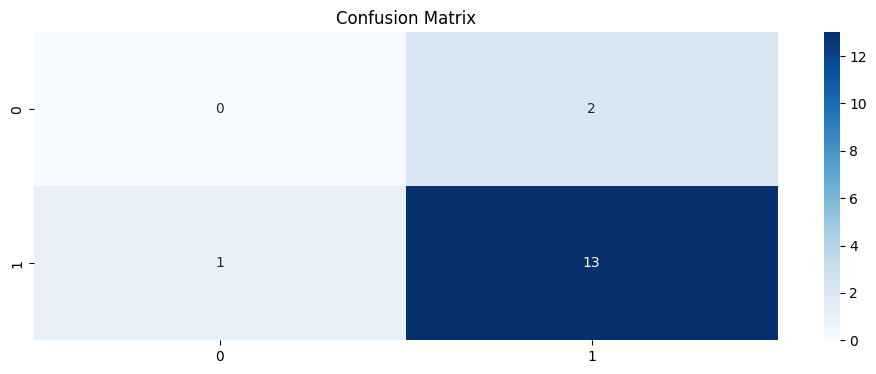


Decision Tree (Without Hyperparamter Tuning) : 



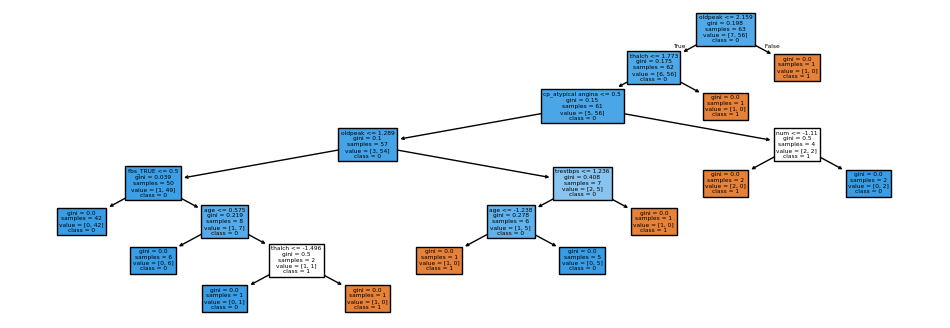


Decision Tree (Hyperparamter Tuning) : 



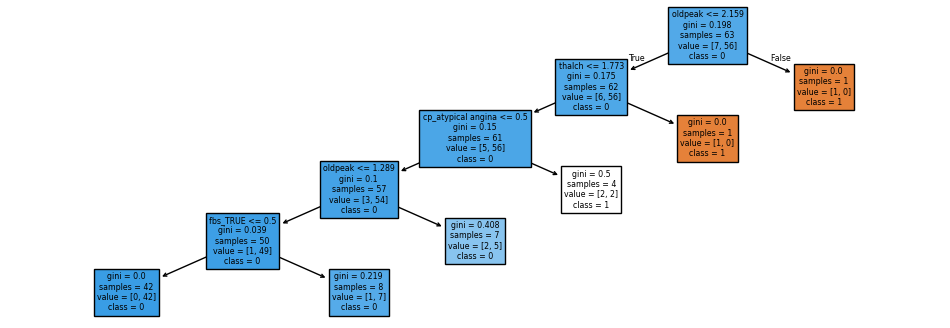

In [8]:
#Visualizations
plt.figure(figsize=(12,4))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(12,4))
print("\nDecision Tree (Without Hyperparamter Tuning) : \n")
plot_tree(dt_model1,feature_names=X.columns,class_names=[str(c) for c in y.unique()],filled=True)
plt.show()

plt.figure(figsize=(12,4))
print("\nDecision Tree (Hyperparamter Tuning) : \n")
plot_tree(dt_model2,feature_names=X.columns,class_names=[str(c) for c in y.unique()],filled=True)
plt.show()

In [ ]:
"""1. Common Hyperparameters of Decision Trees & How They Affect Performance

max_depth – limits how deep the tree can grow; prevents overfitting.

min_samples_split – minimum samples needed to split a node; higher values reduce overfitting.

min_samples_leaf – minimum samples required in a leaf node; makes the model more general.

criterion (e.g., Gini, Entropy) – decides how impurity is measured; affects split quality.

max_features – number of features considered at each split; helps reduce variance.

splitter (best/random) – controls how features are selected for splitting.

max_leaf_nodes – limits number of leaf nodes; simplifies the model.

class_weight – handles imbalanced datasets by giving weights to classes.

These hyperparameters control model complexity.

Proper tuning helps avoid both underfitting and overfitting.

2. Difference Between Label Encoding and One-Hot Encoding

Label Encoding converts categories into numeric labels like 0, 1, 2, 3.

It is used when the categories have order (ordinal data).

But in nominal data, it may create a false sense of priority (e.g., 2 > 1).

One-Hot Encoding converts categories into binary columns (0/1).

Each category gets its own new column.

It is used when categories have no natural order (nominal data).

Example: Red, Blue, Green → 3 columns.

It prevents the model from assuming ranking between categories.

Label Encoding is simple but risky for nominal data.

One-Hot Encoding is safer but increases dimensionality."""